In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Divide the dataset into the independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [4]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
#Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
#Concatenate these variables with Dataframe
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [8]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [9]:
X=pd.concat([X,geography,gender],axis=1)

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [11]:
#splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)   

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [15]:
X_train.shape

(8000, 11)

In [16]:
X_test.shape

(2000, 11)

## ANN Implimentation

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [18]:
#initialize the ANN
classifier = Sequential()

In [19]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [20]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(rate=0.2))

In [21]:
#adding the second hidden layer
classifier.add(Dense(units=5,activation='relu'))
classifier.add(Dropout(rate=0.3))

In [22]:
#Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [23]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20,verbose=1, mode='auto',restore_best_weights=True)

In [25]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000


536/536 [==============================] - 2s 2ms/step - loss: 0.5672 - accuracy: 0.7666 - val_loss: 0.4862 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4938 - accuracy: 0.7966 - val_loss: 0.4504 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4711 - accuracy: 0.7951 - val_loss: 0.4416 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4598 - accuracy: 0.7962 - val_loss: 0.4369 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4534 - accuracy: 0.7964 - val_loss: 0.4361 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4482 - accuracy: 0.8026 - val_loss: 0.4339 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4491 - accuracy: 0.7994 - val_loss: 0.4327 - val_accurac

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

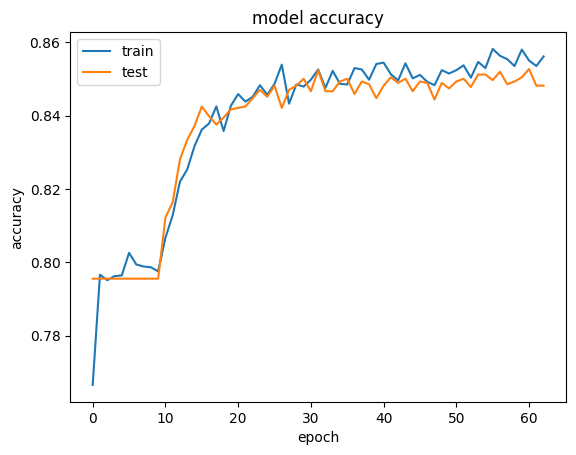

In [27]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

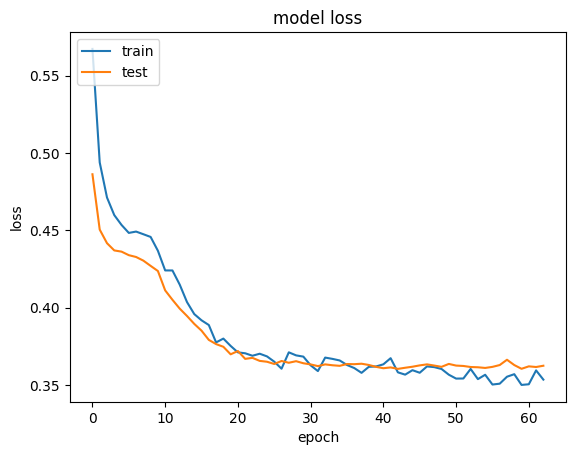

In [28]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
#predicting the test results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 698us/step


In [30]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1550,   45],
       [ 224,  181]], dtype=int64)

In [31]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8655

In [32]:
#getting the weights of the ANN
weights, biases = classifier.layers[0].get_weights()

In [33]:
weights

array([[ 4.64407295e-01, -3.48264314e-02, -2.56390851e-02,
        -4.09546494e-02, -3.30417566e-02,  1.53261825e-01,
        -6.34773225e-02,  2.98267335e-01,  5.11435270e-02,
         3.43327820e-02, -6.79983497e-02],
       [-8.21386755e-01, -7.66088486e-01,  1.69277295e-01,
        -4.70013499e-01,  3.98770906e-02, -3.33351046e-01,
         2.93779522e-01,  2.07342327e-01,  3.15856904e-01,
         3.91052097e-01, -6.18703961e-01],
       [-1.00246884e-01,  6.47601262e-02,  6.12394363e-02,
        -3.92014720e-03,  5.77697717e-02,  2.35294104e-01,
         3.39819998e-01, -3.88651788e-01, -2.93337464e-01,
         5.82063980e-02, -5.12702763e-03],
       [-2.25875467e-01, -3.47619712e-01,  1.13492170e-02,
        -7.82074183e-02, -6.01220965e-01, -6.39565587e-01,
        -5.58984697e-01,  7.39031704e-03, -1.07100151e-01,
        -2.35134467e-01, -3.36632907e-01],
       [-2.31908888e-01, -2.08958805e-01,  1.00911462e+00,
        -9.62652117e-02, -1.44539571e+00, -3.95314395e-01,
  

In [34]:
biases

array([ 0.3475539 ,  0.63839954, -0.22770758,  0.21142031,  0.18647306,
        0.29214406, -0.011938  , -0.13392168, -0.13889974, -0.12526779,
        0.522951  ], dtype=float32)